In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pylab as plt

In [3]:
((train_img, train_num), (test_img, test_num)) = tf.keras.datasets.mnist.load_data()

In [4]:
train_img = train_img.reshape([60000, 28, 28, 1]) / 255.; 
test_img = test_img.reshape([10000, 28, 28, 1]) / 255.
train_lbl = (np.outer(np.arange(10), np.ones([60000])) 
             == np.outer([1], train_num)).astype(int).transpose()
test_lbl = (np.outer(np.arange(10), np.ones([10000])) 
             == np.outer([1], test_num)).astype(int).transpose()

(28, 28, 1)


TypeError: Invalid dimensions for image data

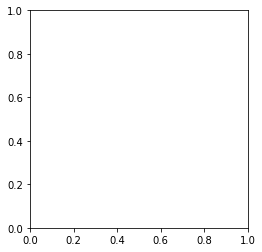

In [8]:
ax = plt.axes(); ax.imshow(train_img[5], cmap='Greys', vmin=-0.2)
ax.grid(False); ax.set_axis_off()

### $(28)^2 \rightarrow 1000 \rightarrow 1000 \rightarrow 10$

In [9]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(keras.layers.Dense(1000, activation=tf.nn.relu))
model.add(keras.layers.Dense(1000, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
hist02 = model.fit(train_img, train_lbl, validation_split=0.2, epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 30s 619us/step - loss: 0.2186 - acc: 0.9363 - val_loss: 0.1467 - val_acc: 0.9632
Epoch 2/20
48000/48000 [==============================] - 40s 827us/step - loss: 0.1247 - acc: 0.9703 - val_loss: 0.1714 - val_acc: 0.9617
Epoch 3/20
48000/48000 [==============================] - 35s 720us/step - loss: 0.1036 - acc: 0.9773 - val_loss: 0.1794 - val_acc: 0.9695
Epoch 4/20
48000/48000 [==============================] - 43s 889us/step - loss: 0.0917 - acc: 0.9813 - val_loss: 0.1849 - val_acc: 0.9718
Epoch 5/20
48000/48000 [==============================] - 41s 863us/step - loss: 0.0812 - acc: 0.9836 - val_loss: 0.2304 - val_acc: 0.9618
Epoch 6/20
48000/48000 [==============================] - 42s 883us/step - loss: 0.0816 - acc: 0.9858 - val_loss: 0.1488 - val_acc: 0.9786
Epoch 7/20
48000/48000 [==============================] - 46s 962us/step - loss: 0.0679 - acc: 0.9879 - val_loss: 0.

In [ ]:
model.evaluate(test_img, test_lbl)

### $(28)^2 \rightarrow 800 \rightarrow 10$

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(keras.layers.Dense(800, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
hist01 = model.fit(train_img, train_lbl, validation_split=0.2, epochs=20)

In [ ]:
model.evaluate(test_img, test_lbl)

### $(28)^2 \rightarrow 256 \rightarrow 256 \rightarrow 10$

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(keras.layers.Dense(256, activation=tf.nn.relu))
model.add(keras.layers.Dense(256, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
hist0 = model.fit(train_img, train_lbl, validation_split=0.2, epochs=20)

In [ ]:
model.evaluate(test_img, test_lbl)

### $(28)^2 \rightarrow 256 \rightarrow 10$

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(keras.layers.Dense(256, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
(train_img.shape, train_num.shape)

In [ ]:
hist1 = model.fit(train_img, train_lbl, validation_split=0.2, epochs=20)

In [ ]:
hist1b = model.fit(train_img, train_lbl, validation_split=0.2, epochs=20)

In [ ]:
model.evaluate(test_img, test_lbl)

In [ ]:
tf.__version__

### $(14)^2 \rightarrow 128 \rightarrow 10$

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.AveragePooling2D(pool_size=2, padding='valid', 
                                        data_format='channels_last'))
model.add(keras.layers.Flatten(input_shape=(14, 14, 1)))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
(train_img.shape, train_lbl.shape)

In [ ]:
hist2 = model.fit(train_img, train_lbl, epochs=10)

In [ ]:
hist2b = model.fit(train_img, train_lbl, epochs=5)

In [ ]:
model.evaluate(test_img, test_lbl)

### $(14)^2 \rightarrow 64 \rightarrow 32 \rightarrow 10$

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.AveragePooling2D(pool_size=2, padding='valid', 
                                        data_format='channels_last'))
model.add(keras.layers.Flatten(input_shape=(14, 14, 1)))
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dense(32, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
hist3 = model.fit(train_img, train_lbl, validation_split=0.2, epochs=20)

In [ ]:
model.evaluate(test_img, test_lbl)

### $(14)^2 \rightarrow 32 \rightarrow 16 \rightarrow 10$

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.AveragePooling2D(pool_size=2, padding='valid', 
                                        data_format='channels_last'))
model.add(keras.layers.Flatten(input_shape=(14, 14, 1)))
model.add(keras.layers.Dense(32, activation=tf.nn.relu))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
hist4 = model.fit(train_img, train_lbl, validation_split=0.2, epochs=20)

In [ ]:
model.evaluate(test_img, test_lbl)

### $(7)^2 \rightarrow 32 \rightarrow 16 \rightarrow 10$

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.AveragePooling2D(pool_size=4, padding='valid', 
                                        data_format='channels_last'))
model.add(keras.layers.Flatten(input_shape=(7, 7, 1)))
model.add(keras.layers.Dense(32, activation=tf.nn.relu))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
hist5 = model.fit(train_img, train_lbl, validation_split=0.2, epochs=20)

In [ ]:
model.evaluate(test_img, test_lbl)

### $(7)^2 \rightarrow 32 \rightarrow 10$

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.AveragePooling2D(pool_size=4, padding='valid', 
                                        data_format='channels_last'))
model.add(keras.layers.Flatten(input_shape=(7, 7, 1)))
model.add(keras.layers.Dense(32, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
hist6 = model.fit(train_img, train_lbl, validation_split=0.2, epochs=20)

In [ ]:
model.evaluate(test_img, test_lbl)

### $(7)^2 \rightarrow 16 \rightarrow 16 \rightarrow 10$


In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.AveragePooling2D(pool_size=4, padding='valid', 
                                        data_format='channels_last'))
model.add(keras.layers.Flatten(input_shape=(7, 7, 1)))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
hist7 = model.fit(train_img, train_lbl, validation_split=0.2, epochs=20)

In [ ]:
model.evaluate(test_img, test_lbl)

### $(7)^2 \rightarrow 10$ (single-layer)

In [11]:
model = tf.keras.Sequential()
model.add(keras.layers.AveragePooling2D(pool_size=4, padding='valid', 
                                        data_format='channels_last'))
model.add(keras.layers.Flatten(input_shape=(7, 7, 1)))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [12]:
hist8 = model.fit(train_img, train_lbl, validation_split=0.2, epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 41us/step - loss: 1.5390 - acc: 0.6526 - val_loss: 1.0069 - val_acc: 0.8173
Epoch 2/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.8496 - acc: 0.8150 - val_loss: 0.6841 - val_acc: 0.8512
Epoch 3/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.6544 - acc: 0.8420 - val_loss: 0.5636 - val_acc: 0.8658
Epoch 4/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.5687 - acc: 0.8538 - val_loss: 0.5030 - val_acc: 0.8729
Epoch 5/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.5212 - acc: 0.8615 - val_loss: 0.4671 - val_acc: 0.8765
Epoch 6/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.4908 - acc: 0.8670 - val_loss: 0.4431 - val_acc: 0.8787
Epoch 7/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.4697 - acc: 0.8702 - val_loss: 0.4260 - val_acc

In [13]:
model.evaluate(test_img, test_lbl)

10000/10000 [==============================] - 0s 26us/step


[0.3723600054860115, 0.8914]

### Comparison Between Models

Models used here:

$(28\times 28) \rightarrow 800 \rightarrow 10$

$(28\times 28) \rightarrow 256 \rightarrow 256 \rightarrow 10$

$(14\times 14) \rightarrow 64 \rightarrow 32 \rightarrow 10$

$(14\times 14) \rightarrow 32 \rightarrow 16 \rightarrow 10$

$(7\times 7) \rightarrow 32 \rightarrow 16 \rightarrow 10$

$(7\times 7) \rightarrow 16 \rightarrow 16 \rightarrow 10$

$(7\times 7) \rightarrow 10$

In [ ]:
acc = np.array([0.9798, 0.9784, 0.9725, 0.9682, 0.9394, 0.9280, 0.8913])
macs = np.array([28*28*800+800*10, 28*28*256+256*256+256*10, 14*14*64+64*32+32*10, 14*14*32+32*16+16*10, 
                 7*7*32+32*16+16*10, 7*7*16+16*16+16*10, 7*7*10])

In [ ]:
plt.plot(macs, 100*(1 - acc), 'o'); plt.xscale("log");
plt.xlabel("MACs"); plt.ylabel("Error rate (%)"); plt.ylim(0, 12);